In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches

# File to Load (Remember to change these)
city_data_to_load = "./data/city_data.csv"
ride_data_to_load = "./data/ride_data.csv"

# Read the City and Ride Data

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()
city_data_df.head()


# Combine the data into a single dataset
city_data_df.columns
ride_data_df.columns

CityRide = pd.merge(ride_data_df,city_data_df,how='left',on='city')

# Display the data table for preview
CityRide.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [4]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [5]:
# Variables to use in the Bubble Plot
VCityRide = CityRide.groupby(['city']+['type']+['driver_count'])

# Average fare($) per City
Ave_City = VCityRide['fare'].mean()

# Total # of Rides Per City
Total_Rides = VCityRide['ride_id'].count()

df = pd.DataFrame({"AveFare":Ave_City, "TotalRides":Total_Rides})
df = df.reset_index()

Text(42, 37, 'Note:\n Circle size correlates with driver count per city')

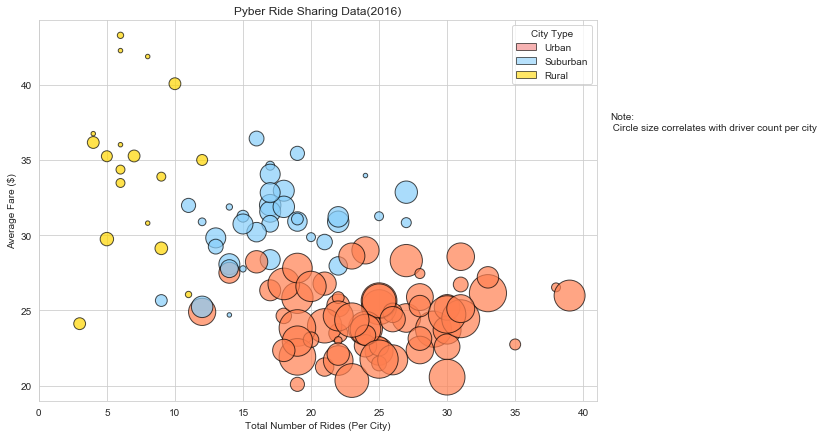

In [21]:
# Scatter function
colors = {'Urban':'coral', 'Suburban':'lightskyblue', 'Rural':'gold'}

U = mpatches.Circle((0.5, 0.5), 0.1, facecolor="lightcoral",alpha=.6,edgecolor="black",linewidth=1)
S = mpatches.Circle((0.5, 0.5), 0.1, facecolor="lightskyblue",alpha=.6,edgecolor="black", linewidth=1)
R = mpatches.Circle((0.5, 0.5), 0.1, facecolor="gold",alpha=.6,edgecolor="black", linewidth=1)

#Draw Bubble Chart
sns.set_style('whitegrid') 
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(df['TotalRides'], df['AveFare'], s=df['driver_count']*20, c=df['type'].apply(lambda x:colors[x]),alpha=.7, linewidth=1, edgecolor='black')
ax.legend([U,S,R],["Urban","Suburban","Rural"],title= 'City Type')

# Set x and y limits
ax.set_xlim(0, max(df['TotalRides'])+2)
ax.set_ylim(19, max(df['AveFare'])+1)
ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fare ($)")
ax.set_title("Pyber Ride Sharing Data(2016)")
ax.text(42,37,'Note:\n Circle size correlates with driver count per city')


 

In [7]:
# Show plot
plt.show()


## Total Fares by City Type

In [8]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [9]:
# calculate variables that will be used in the Pie Chart
GType = CityRide.groupby(['type'])
GGType =CityRide.groupby(['type'])

# Calculate Total fare($) Per CityType
TFare = GType['fare'].sum()

# Calculate Total Rides Per CityType
TRides = GType['ride_id'].count()

# Calculate Total Drivers Per CityType
TDrivers = GGType['driver_count'].sum()

df1 = pd.DataFrame({"TotalFare":TFare, "TotalRides":TRides, "TotalDrivers":TDrivers})
df1 = df1.reset_index()
df1

,type,TotalFare,TotalRides,TotalDrivers
0,Rural,4327.93,125,537
1,Suburban,19356.33,625,8570
2,Urban,39854.38,1625,59602


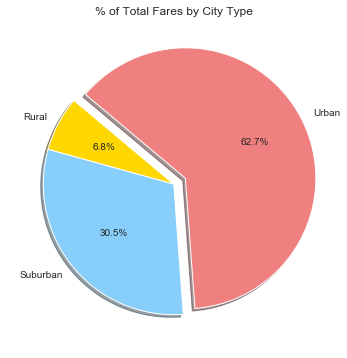

In [10]:
# Plot % of Fares by City Type
# Labels for the sections of our pie chart
labels = df1['type']

# The values of each section of the pie chart
sizes = df1['TotalFare']

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Creates the pie chart based upon the values above
# update graph size 
# Automatically finds the percentages of each part of the pie chart
plt.figure(figsize=(10,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=140)
            
# Update Title
plt.title("% of Total Fares by City Type")
# Prints our pie chart to the screen
plt.show()

In [11]:
# Show Figure
plt.show()

## Total Rides by City Type

In [12]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


Text(0.5, 1.0, '% of Total Rides by City Type')

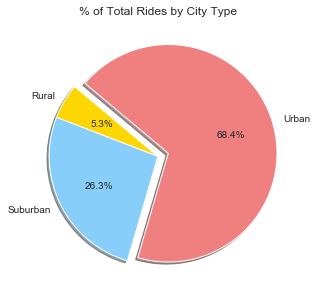

In [13]:
# Plot % of Total Rides by City Type
# Labels for the sections of our pie chart
labels = df1['type']

# The values of each section of the pie chart
sizes = df1['TotalRides']

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Creates the pie chart based upon the values above
# update graph size 
# Automatically finds the percentages of each part of the pie chart
plt.figure(figsize=(9,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=140)
            
# Update Title
plt.title("% of Total Rides by City Type")

In [14]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [15]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


Text(0.5, 1.0, '% of Total Drivers by City Type')

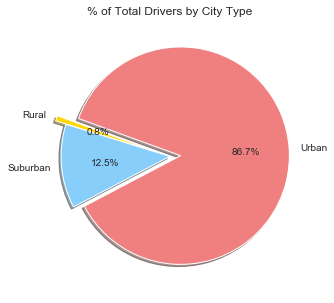

In [16]:
# Plot % of Total Drivers by City Type
# Labels for the sections of our pie chart
labels = df1['type']

# The values of each section of the pie chart
sizes = df1['TotalDrivers']

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0.1)

# Creates the pie chart based upon the values above 
# update graph size 
# Automatically finds the percentages of each part of the pie chart
plt.figure(figsize=(9,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=160)
            
# Update Title
plt.title("% of Total Drivers by City Type")


In [17]:
# Show Figure
plt.show()

In [18]:
#fin........................................................................ ##